# Telecom Customer Churn Prediction

<b><br>Problem statement: Based on all information from this data set, a model was made to predict whether a particular customer will churn or not.
<br><br>During the model development, data set was separated in train (70% of data) and test(30% of data) data. 
<br>On the train data, a model was build that calculates which attributes are significantly related to churn (eg. 'tenure - Contract Duration', 'PhoneService', 'PaperlessBilling', 'TotalCharges', OnlineBackup', 'TechSupport'..). 
<br> When model was applied on the test data, Churn was predicted with an accuracy of 78%</b>
<br><br> Source: Kaggle
<br>This data set contains the following data with following features:
1. churn_data.csv
    * 'customerID'
    * 'tenure'
    * 'PhoneService'
    * 'PaperlessBilling'
    * 'PaymentMethod'
    * 'MonthlyCharges'
    * 'TotalCharges'
    * 'Churn' 
2. customer_data.csv
    * 'customerID'
    * 'gender'
    * 'SeniorCitizen'
    * 'Partner'
    * 'Dependents'    
3. internet_data.csv
    * 'customerID'
    * 'MultipleLines'
    * 'InternetService'
    * 'OnlineSecurity'
    * 'OnlineBackup'
    * 'DeviceProtection'
    * 'TechSupport'
    * 'StreamingTV'
    * 'StreamingMovies'



### IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report

### IMPORTING AND MERGING DATASETS

In [2]:
# importing datasets
churn = pd.read_csv('churn_data.csv')
customer = pd.read_csv('customer_data.csv')
internet = pd.read_csv('internet_data.csv')

# merging churn and customer dataframe on customerID
df_1 = pd.merge(churn, customer, how='inner', on='customerID')

# merging df_1 and internet dataframe on customerID
data = pd.merge(df_1,internet, how='inner', on = 'customerID')

# 1. EXPLORATORY DATA ANALYSIS AND DATA CLEANING
### Checking merged dataframe and data statistics

In [3]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [4]:
data.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7042.000000,7042.000000,7042.000000
mean,32.366373,64.755886,0.162170
std,24.557955,30.088238,0.368633
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
customerID          7042 non-null object
tenure              7042 non-null int64
PhoneService        7042 non-null object
Contract            7042 non-null object
PaperlessBilling    7042 non-null object
PaymentMethod       7042 non-null object
MonthlyCharges      7042 non-null float64
TotalCharges        7042 non-null object
Churn               7042 non-null object
gender              7042 non-null object
SeniorCitizen       7042 non-null int64
Partner             7042 non-null object
Dependents          7042 non-null object
MultipleLines       7042 non-null object
InternetService     7042 non-null object
OnlineSecurity      7042 non-null object
OnlineBackup        7042 non-null object
DeviceProtection    7042 non-null object
TechSupport         7042 non-null object
StreamingTV         7042 non-null object
StreamingMovies     7042 non-null object
dtypes: float64(1), int64(2), obj

* With data.info() can be seen that the data set has 7042 entries with textual (object) and numerical (int64 & float64) data

In [6]:
# Checking for null values
data.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

* Data set does not contain any null values

With data analysis, it is discovered that some of the values are in the wrong format and that some of the data contain whitespaces.
<br> In order for a model to work properly, it is necessary to make 'data wrangling', eg. remove whitespace and convert data to right format.

In [7]:
# TotalCharges is an object and not float!!!
# We don´t have null values but from error we can see that column 'TotalCharges' contains whitespace = ' '

# data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [8]:
# How many whitespace = ' ' we have in column 'TotalCharges'
data['TotalCharges'].str.isspace().value_counts()

False    7031
True       11
Name: TotalCharges, dtype: int64

* Data set contains 11 data that contain whitespaces

In [9]:
data['TotalCharges'].isnull().sum()

0

### Replacing whitespace to NAN values and converting to numeric data (float)

In [10]:
# Replacing whitespace to NAN values and converting to numeric data (float)
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [11]:
# How many NAN values is in column
data['TotalCharges'].isnull().sum()

11

In [12]:
# Replacing NAN values with mean value from all data in column 'TotalCharges'

#new_value = data['TotalCharges'].astype('float').mean(axis=0)

new_value = (data['TotalCharges']/data['MonthlyCharges']).mean()*data['MonthlyCharges']
data['TotalCharges'].replace(np.nan, new_value, inplace=True)

In [13]:
# How many NAN values is in column 'TotalCharges' after replacing NAN with mean 
data['TotalCharges'].isnull().sum()

0

In [14]:
# Checking for null values
data.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

### Data Visualization

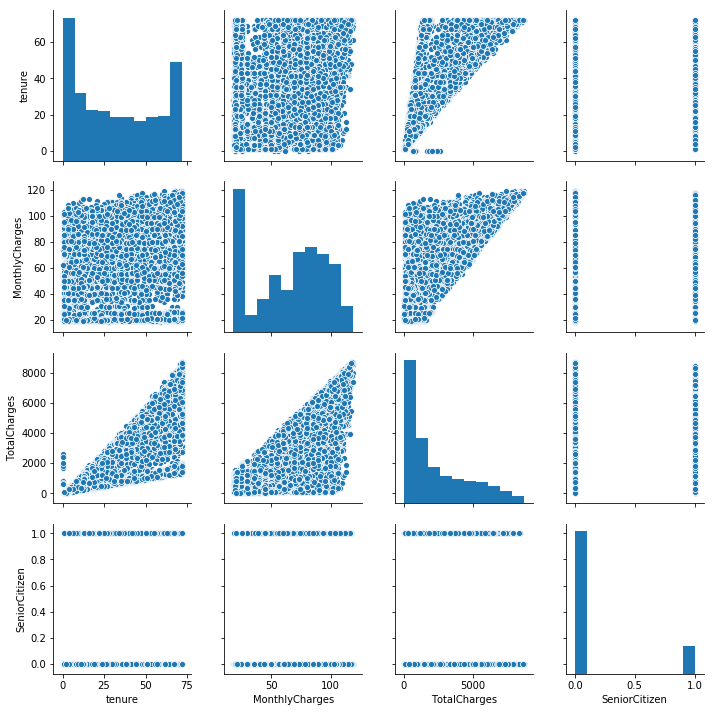

In [15]:
sns.pairplot(data=data)

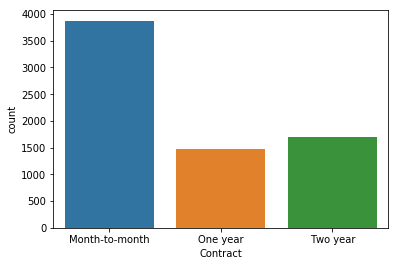

In [16]:
sns.countplot(x = 'Contract', data=data)

* Ration of contracts: Month-to-month vs. One year Contract vs. Two year

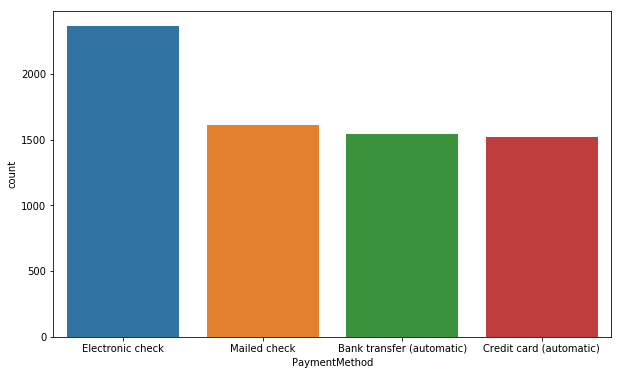

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'PaymentMethod', data=data)

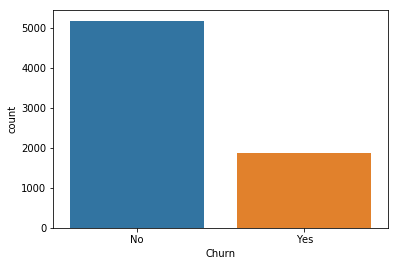

In [18]:
sns.countplot(x = 'Churn', data=data)

* From ~7000 customers approximately ~2000 has churned

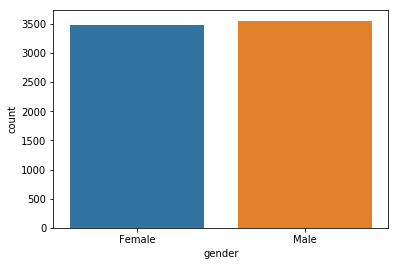

In [19]:
sns.countplot(x = 'gender', data=data)

# 2. DATA PRETPROCESSING

In [20]:
pd.set_option('display.max_columns', 500)
data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Female,0,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,Male,0,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.90,No,Female,0,No,No,No phone service,DSL,Yes,No,No,No,No,No
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Female,0,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No,Male,0,No,Yes,No,DSL,Yes,Yes,No,No,No,No


In [21]:
# Making list for columns for One Hot Encoding
lista = ['PhoneService','PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# With .map method and lambda function turning Yes/No into 1/0
data[lista] = data[lista].apply(lambda x:x.map({'Yes': 1, "No": 0}))
data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,8,1,Month-to-month,1,Electronic check,99.65,820.50,1,Female,0,0,0,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,22,1,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,Male,0,0,1,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,10,0,Month-to-month,0,Mailed check,29.75,301.90,0,Female,0,0,0,No phone service,DSL,Yes,No,No,No,No,No
8,7892-POOKP,28,1,Month-to-month,1,Electronic check,104.80,3046.05,1,Female,0,1,0,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,62,1,One year,0,Bank transfer (automatic),56.15,3487.95,0,Male,0,0,1,No,DSL,Yes,Yes,No,No,No,No


In [22]:
# checking other data npr. 'StreamingMovies'
data['StreamingMovies'].value_counts()

No                     2785
Yes                    2731
No internet service    1526
Name: StreamingMovies, dtype: int64

In [23]:
# Making dummy variables for categorical data with more inputs

data_dummy = pd.get_dummies(data[['Contract', 'PaymentMethod', 'gender', 'MultipleLines', 'InternetService', 
                                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                    'TechSupport', 'StreamingTV', 'StreamingMovies']], drop_first=True)
data_dummy.head()

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Merging original data frame with 'dummy' dataframe
data = pd.concat([data,data_dummy], axis=1)
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
data.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovi

In [26]:
# Dropping attributes for which we made dummy variables

data = data.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

# 3. MODEL DEVELOPMENT

In [27]:
# setting Independent variable (X) and Dependent variable (y)
X = data.drop(['Churn','customerID'], axis=1)
y = data['Churn']

# spliting data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [28]:
# since data are within long-range (0 - 8684) it is necessary to perform data standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### Model Training

In [29]:
# just checking X_train before standardization
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
877,51,0,0,60.15,3077.00,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1
5791,63,1,1,102.40,6444.05,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1
5334,49,1,1,107.95,5293.20,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1
878,60,1,0,64.75,4039.50,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
6577,70,1,0,72.95,5265.55,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0


In [30]:
# standardization on X_train
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
877,0.760073,0,0,-0.149413,0.350874,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1
5791,1.249022,1,1,1.249568,1.836491,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1
5334,0.678582,1,1,1.433339,1.328711,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1
878,1.126785,1,0,0.002902,0.775550,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
6577,1.534241,1,0,0.274420,1.316511,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0


In [31]:
# Ordinary Least Squares: sm.OLS(y, X)
mod1 = sm.OLS(y_train,X_train,data=data)

In [32]:
results1 = mod1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     88.89
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:22:58   Log-Likelihood:                -2101.0
No. Observations:                4929   AIC:                             4250.
Df Residuals:                    4905   BIC:                             4406.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [33]:
# LogisticRegression object as lr
lr = LogisticRegression()

In [34]:
#  RFE - Feature ranking with recursive feature elimination.
rfe = RFE(estimator=lr, n_features_to_select=20, step=1)    
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [35]:
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True False  True  True  True False  True
 False False False  True  True  True  True  True  True  True  True False
  True  True False  True False False]
[ 1  1  1  9  1  1 11  1  1  1  6  1  7  8  3  1  1  1  1  1  1  1  1 10
  1  1  5  1  2  4]


In [36]:
# making list and dataframe to see what attributes was selected
list_for_df = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
df = pd.DataFrame(list_for_df, columns = ['X_train.columns', 'rfe.support_', 'rfe.ranking_'])
df.head()

,X_train.columns,rfe.support_,rfe.ranking_
0,tenure,True,1
1,PhoneService,True,1
2,PaperlessBilling,True,1
3,MonthlyCharges,False,9
4,TotalCharges,True,1


In [37]:
# the list of attributes that are selected
sel_att = X_train.columns[rfe.support_]
sel_att

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

In [38]:
#Adding a constant
X_train_const = sm.add_constant(X_train[sel_att])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
# Ordinary Least Squares: sm.OLS(y, X)
mod2 = sm.OLS(y_train,X_train_const,data=data)
results2 = mod2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     126.9
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:22:58   Log-Likelihood:                -2106.7
No. Observations:                4929   AIC:                             4247.
Df Residuals:                    4912   BIC:                             4358.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [40]:
# Getting the predicted values on the train set
y_predicted_train = results2.predict(X_train_const)
y_predicted_train

877    -0.013664
5791    0.342657
5334    0.192177
878    -0.007841
6577   -0.038891
3090    0.465142
3043    0.565355
5028    0.052261
4463    0.646763
2822    0.030252
4206   -0.024054
1247    0.296761
3493    0.400738
266     0.034145
4927    0.039178
242     0.017897
737    -0.097882
4311    0.378727
3214    0.303570
5951    0.363304
4321    0.633191
389     0.398839
5779    0.271873
688     0.087898
4617    0.223352
499     0.492467
6300   -0.000457
4264    0.507828
340     0.186410
5248    0.204991
          ...   
4993   -0.064250
2463    0.595809
6020    0.064677
1900    0.084046
5787    0.383041
2434    0.145684
6230    0.151204
5769    0.081042
1531    0.222455
2960    0.600410
1340    0.146848
1899    0.448519
3300   -0.035606
1679    0.417763
4376    0.263163
2800    0.097192
5105    0.255745
802     0.085679
5646    0.151238
5698    0.529727
4149    0.144924
1890    0.266968
6068    0.405984
350     0.102979
6026    0.147730
79      0.017735
3927    0.220975
5955   -0.1482

In [41]:
# making dataframe for train values and predicted values with 'customerID'as index
final_y_predicted_df = pd.DataFrame(index= y_train.index, columns=('Churn','Churn_Predicted_Initial'))
final_y_predicted_df = pd.DataFrame({'Churn':y_train.values, 'Churn_Predicted_Initial':y_predicted_train})
final_y_predicted_df.index.name = 'customerID'
final_y_predicted_df

,Churn,Churn_Predicted_Initial
customerID,,
877,0,-0.013664
5791,0,0.342657
5334,1,0.192177
878,0,-0.007841
6577,0,-0.038891
3090,1,0.465142
3043,1,0.565355
5028,0,0.052261
4463,1,0.646763


In [42]:
# TRAIN DATA & PREDICTED ON TRAIN DATA
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
final_y_predicted_df['Churn_Predicted_Final'] = final_y_predicted_df.Churn_Predicted_Initial.map(lambda x: 1 if x > 0.5 else 0)
final_y_predicted_df

,Churn,Churn_Predicted_Initial,Churn_Predicted_Final
customerID,,,
877,0,-0.013664,0
5791,0,0.342657,0
5334,1,0.192177,0
878,0,-0.007841,0
6577,0,-0.038891,0
3090,1,0.465142,0
3043,1,0.565355,1
5028,0,0.052261,0
4463,1,0.646763,1


In [43]:
# Confusion matrix for train data
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(final_y_predicted_df['Churn'], final_y_predicted_df['Churn_Predicted_Final'])
print(confusion_matrix)

[[3287  338]
 [ 608  696]]


In [44]:
# Accuracy_score for train data
from sklearn.metrics import classification_report
print(classification_report(final_y_predicted_df['Churn'], final_y_predicted_df['Churn_Predicted_Final']))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3625
           1       0.67      0.53      0.60      1304

   micro avg       0.81      0.81      0.81      4929
   macro avg       0.76      0.72      0.73      4929
weighted avg       0.80      0.81      0.80      4929



In [45]:
# Overall accuracy.
metrics.accuracy_score(final_y_predicted_df['Churn'], final_y_predicted_df['Churn_Predicted_Final'])

0.8080746601744776

### Model Testing

In [46]:
# standardization on X_test
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

#Adding a constant
X_test_const = sm.add_constant(X_test[sel_att])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [47]:
# Getting the predicted values on the test set
y_predicted_test = results2.predict(X_test_const)
y_predicted_test

4880   -0.016823
1541   -0.074099
1289   -0.118914
5744    0.221401
4873    0.162989
4168    0.055660
1557    0.335558
2892    0.179656
664    -0.062645
1588    0.307744
1338    0.179669
5999    0.365077
2310   -0.027482
3294    0.549420
290     0.655679
2505    0.004921
3171    0.111625
1366    0.715831
6559    0.295726
2420    0.371584
5210    0.127105
2836    0.387269
1325    0.712663
4900    0.629936
6310    0.134706
1025    0.111875
2031    0.348008
4459    0.660995
5324    0.148367
3441    0.055246
          ...   
5982    0.038716
1481   -0.068130
3242    0.081030
6344    0.510619
5284    0.569211
2519    0.758363
6696    0.597977
5554   -0.004707
4355    0.462930
5813    0.102824
3624    0.269535
1098    0.006410
5542   -0.059688
2834   -0.064172
3443    0.215256
3606    0.233241
6630    0.635281
6168    0.646519
5461   -0.039454
405    -0.028997
3118   -0.038825
7006    0.419337
485     0.154143
201     0.406179
2376    0.351362
1285    0.736451
5092    0.134434
5836    0.0634

In [48]:
# making dataframe for test values and predicted values with 'customerID'as index
final_y_predicted_train = pd.DataFrame(index= y_test.index, columns=('Churn','Churn_Predicted_Initial'))
final_y_predicted_train = pd.DataFrame({'Churn':y_test.values, 'Churn_Predicted_Initial':y_predicted_test})
final_y_predicted_train.index.name = 'customerID'
final_y_predicted_train

,Churn,Churn_Predicted_Initial
customerID,,
4880,0,-0.016823
1541,0,-0.074099
1289,0,-0.118914
5744,0,0.221401
4873,0,0.162989
4168,0,0.055660
1557,0,0.335558
2892,0,0.179656
664,0,-0.062645


In [49]:
# TEST DATA & PREDICTED ON TEST DATA
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
final_y_predicted_train['Churn_Predicted_Final'] = final_y_predicted_train.Churn_Predicted_Initial.map(lambda x: 1 if x > 0.5 else 0)
final_y_predicted_train

,Churn,Churn_Predicted_Initial,Churn_Predicted_Final
customerID,,,
4880,0,-0.016823,0
1541,0,-0.074099,0
1289,0,-0.118914,0
5744,0,0.221401,0
4873,0,0.162989,0
4168,0,0.055660,0
1557,0,0.335558,0
2892,0,0.179656,0
664,0,-0.062645,0


In [50]:
# Confusion matrix for test data
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(final_y_predicted_train['Churn'], final_y_predicted_train['Churn_Predicted_Final'])
print(confusion_matrix)

[[1379  169]
 [ 287  278]]


In [51]:
# Accuracy_score for train data
from sklearn.metrics import classification_report
print(classification_report(final_y_predicted_train['Churn'], final_y_predicted_train['Churn_Predicted_Final']))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1548
           1       0.62      0.49      0.55       565

   micro avg       0.78      0.78      0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.78      2113



In [52]:
# Overall accuracy.
metrics.accuracy_score(final_y_predicted_train['Churn'], final_y_predicted_train['Churn_Predicted_Final'])

0.7841930903928065

###  Comparison: Logistic Regression without RFE - Recursive Feature Elimination

In [53]:
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
predictions_lr = lr.predict(X_test)

In [55]:
print(classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1548
           1       0.62      0.53      0.57       565

   micro avg       0.79      0.79      0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113

